In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bootstrap
import seaborn as sns


results_dtypes = {
    '\nHyperparameter set': str, 'j': int, 'nshd_c': float, 'tpr_c': float}
hps = '\nHyperparameter set'
meanprops={
    "marker":"o", "markerfacecolor":"white", "markeredgecolor":"black",
    "markersize":"10"
}
usecols = [hps, 'j', 'nshd_c', 'tpr_c']
results = pd.read_csv('big.csv', usecols=usecols).astype(results_dtypes)
grouped_results = results.groupby(hps)
sorted = lambda df: df.sort_values(by=hps, ascending=False)

LENGTH = len(results) // 2
assert LENGTH == 240

FIG_SIZE = (10, 6)
matplotlib.rcParams.update({'font.size': 16})

In [2]:
print('Means:')
print(sorted(grouped_results.mean()[['nshd_c', 'tpr_c']]))
print('Std dev:')
print(sorted(grouped_results.std()[['nshd_c', 'tpr_c']]))
print('Quartiles:')
print(sorted(results.groupby("\nHyperparameter set").quantile(q=[0.25, 0.75]))
[['nshd_c', 'tpr_c']])

Means:
                        nshd_c     tpr_c
\nHyperparameter set                    
STE_Logistic_84       0.735278  0.813590
IMLE_Logistic_None    1.150554  0.718103
Std dev:
                        nshd_c     tpr_c
\nHyperparameter set                    
STE_Logistic_84       0.489250  0.126956
IMLE_Logistic_None    0.789961  0.159628
Quartiles:
                           nshd_c     tpr_c
\nHyperparameter set                       
STE_Logistic_84      0.25  0.4000  0.758475
                     0.75  0.9000  0.896950
IMLE_Logistic_None   0.25  0.6333  0.632500
                     0.75  1.4000  0.827850


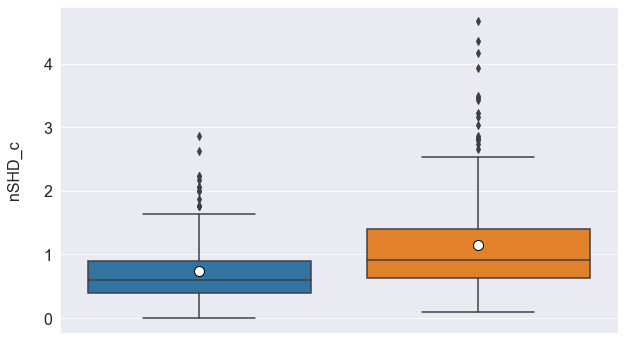

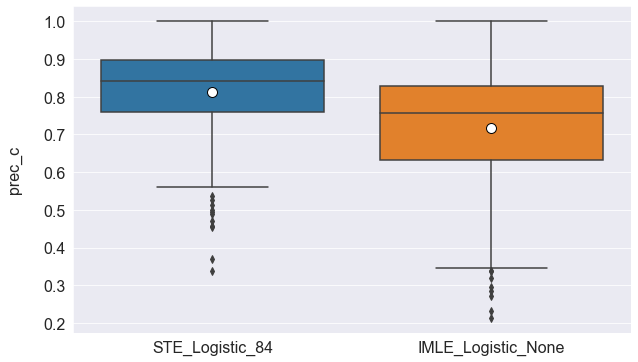

In [3]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
frame1 = sns.boxplot(
	x='\nHyperparameter set', y='nshd_c', data=results,
	showmeans=True, meanprops=meanprops)
# plt.xticks(rotation = 75, ha='right')
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.set_xlabel(None)
frame1.axes.set_ylabel('nSHD_c\n')
# frame1.axes.set_title(r'nSHD$_c$')
plt.savefig('big_nshd_c.pdf')
fig, ax = plt.subplots(figsize=FIG_SIZE)
frame1 = sns.boxplot(
	x='\nHyperparameter set', y='tpr_c', data=results,
	showmeans=True, meanprops=meanprops)
frame1.axes.set_ylabel('prec_c\n')  # Correct metric name
# plt.xticks(rotation=75, ha='right')
# frame1.axes.set_title(r'tpr$_c$')
# plt.tight_layout()
frame1.axes.set_xlabel(None)
plt.savefig('big_tpr_c.pdf');

In [4]:
means_nshd_c = {'STE_Logistic_84': [], 'IMLE_Logistic_None': []}
means_tpr_c = {'STE_Logistic_84': [], 'IMLE_Logistic_None': []}
dfs = {
    hp_set: results[results[hps] == hp_set].drop(columns=[hps])
    for hp_set in means_nshd_c
}
for j in range(1, 10 + 1):
    for hp_set in means_nshd_c:
        job_mean = dfs[hp_set][dfs[hp_set]['j'] == j].mean()
        means_nshd_c[hp_set].append(job_mean['nshd_c'])
        means_tpr_c[hp_set].append(job_mean['tpr_c'])

print({hp_set: np.std(means_nshd_c[hp_set]) for hp_set in means_nshd_c})
print({hp_set: np.std(means_tpr_c[hp_set]) for hp_set in means_tpr_c})

{'STE_Logistic_84': 0.10140708092537493, 'IMLE_Logistic_None': 0.18081449175075354}
{'STE_Logistic_84': 0.02702817898418959, 'IMLE_Logistic_None': 0.03372167516145131}


In [5]:
rng = np.random.default_rng(seed = 42)
sample_sets = 100_000
means_nshd_c = {'STE_Logistic_84': [], 'IMLE_Logistic_None': []}
means_tpr_c = {'STE_Logistic_84': [], 'IMLE_Logistic_None': []}
for sample_no in range(sample_sets):
    sample = rng.choice(LENGTH, size=24, replace=False)
    for hp_set in means_nshd_c:
        mean = dfs[hp_set].iloc[sample].mean()
        means_nshd_c[hp_set].append(mean['nshd_c'])
        means_tpr_c[hp_set].append(mean['tpr_c'])

print({hp_set: np.std(means_nshd_c[hp_set]) for hp_set in means_nshd_c})
print({hp_set: np.std(means_tpr_c[hp_set]) for hp_set in means_tpr_c})


{'STE_Logistic_84': 0.0947330384812866, 'IMLE_Logistic_None': 0.15258281708949578}
{'STE_Logistic_84': 0.024583599998256656, 'IMLE_Logistic_None': 0.030799009610234986}


In [6]:
tab = pd.DataFrame({
    'Metric': [r'\tnshdc', r'$\tprc$'],
    r'\hpset{STE}{Logistic}{84}': [
        np.std(means_nshd_c['STE_Logistic_84']),
        np.std(means_tpr_c['STE_Logistic_84'])
    ],
    '\hpset{IMLE}{Logistic}{None}': [
        np.std(means_nshd_c['IMLE_Logistic_None']),
        np.std(means_tpr_c['IMLE_Logistic_None'])
    ],
})
print(tab.to_latex())

\begin{tabular}{llrr}
\toprule
{} &   Metric &  \textbackslash hpset\{STE\}\{Logistic\}\{84\} &  \textbackslash hpset\{IMLE\}\{Logistic\}\{None\} \\
\midrule
0 &  \textbackslash tnshdc &                   0.094733 &                      0.152583 \\
1 &  \$\textbackslash tprc\$ &                   0.024584 &                      0.030799 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_66266/2479325257.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tab.to_latex())


In [7]:
means = list()
for hp_set in means_nshd_c:
    hp_set_means = pd.DataFrame(
        {'nshd_c': means_nshd_c[hp_set], 'tpr_c': means_tpr_c[hp_set]})
    hp_set_means[hps] = hp_set
    means.append(hp_set_means)

means = pd.concat(means, ignore_index=True)

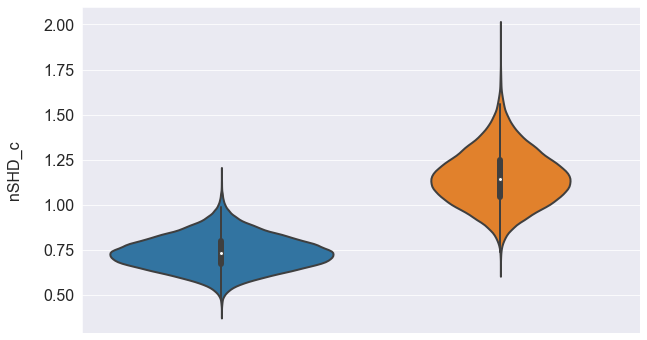

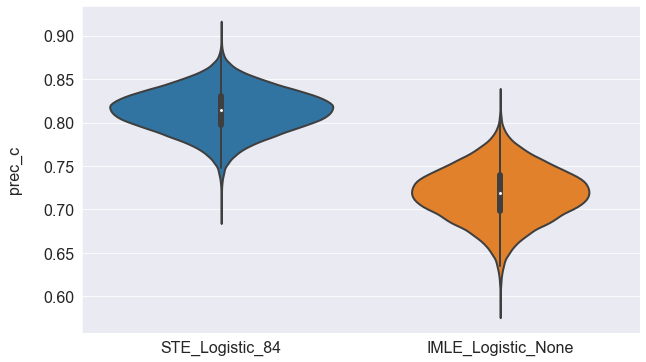

In [15]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
frame1 = sns.violinplot(
	x='\nHyperparameter set', y='nshd_c', data=means,
	showmeans=True, meanprops=meanprops,
    linewidth=2
)
# plt.xticks(rotation = 75, ha='right')
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.set_xlabel(None)
frame1.axes.set_ylabel('nSHD_c\n')
# frame1.axes.set_title(r'nSHD$_c$')
plt.savefig('big_violin_nshd_c.pdf')
fig, ax = plt.subplots(figsize=FIG_SIZE)
frame1 = sns.violinplot(
	x='\nHyperparameter set', y='tpr_c', data=means,
	showmeans=True, meanprops=meanprops,
    linewidth=2)
# plt.xticks(rotation=75, ha='right')
# plt.tight_layout()
frame1.axes.set_xlabel(None)
frame1.axes.set_ylabel('prec_c\n')  # Correct metric name
# frame1.axes.set_title(r'tpr$_c$')
plt.savefig('big_violin_tpr_c.pdf');

## Find median DAG set

In [9]:
job_nshd_c = pd.DataFrame({hp_set: means_nshd_c[hp_set] for hp_set in means_nshd_c})
job_tpr_c = pd.DataFrame({hp_set: means_tpr_c[hp_set] for hp_set in means_nshd_c})

In [10]:
job_nshd_c.sort_values('STE_Logistic_84')

,STE_Logistic_84,IMLE_Logistic_None
84131,0.390283,1.327775
15331,0.400004,1.162500
89419,0.404158,1.155554
50893,0.405550,0.836112
8267,0.405554,1.301392
...,...,...
91881,1.154167,1.295829
68962,1.161112,1.491667
8744,1.176387,1.136117
93181,1.179167,1.011121


In [11]:
job_nshd_c.sort_values('IMLE_Logistic_None')

,STE_Logistic_84,IMLE_Logistic_None
75697,0.713892,0.633333
41456,0.743058,0.634717
58269,0.830546,0.681946
44022,0.761108,0.683333
39047,0.636113,0.684717
...,...,...
90479,0.695842,1.825000
1100,0.797221,1.837496
77348,0.656950,1.845829
94893,0.743058,1.854167


In [12]:
job_tpr_c.sort_values('STE_Logistic_84')

,STE_Logistic_84,IMLE_Logistic_None
8744,0.688817,0.720804
54203,0.697763,0.673992
95172,0.705567,0.711058
68962,0.707408,0.651608
23585,0.708829,0.724729
...,...,...
8267,0.902712,0.678754
91176,0.902846,0.725012
89419,0.903950,0.723625
84131,0.909671,0.698458


In [13]:
job_tpr_c.sort_values('IMLE_Logistic_None')

,STE_Logistic_84,IMLE_Logistic_None
65197,0.806571,0.581683
95474,0.830167,0.588429
94893,0.803692,0.590738
1100,0.804867,0.592108
90479,0.820375,0.594483
...,...,...
59450,0.797971,0.826504
44022,0.811046,0.826508
78468,0.831137,0.828833
58269,0.791362,0.832383


So job 1 is the most representative as a median, i.e. DAGS '000'